In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing of Customer Data

In [2]:
df_customers = pd.read_csv('data/olist_customers_dataset.csv')
df_orders = pd.read_csv('data/olist_orders_dataset.csv')
df_items = pd.read_csv('data/olist_order_items_dataset.csv')
df_products = pd.read_csv('data/olist_products_dataset.csv')
df_geolocation = pd.read_csv('data/olist_geolocation_dataset.csv')

In [3]:
df_customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [4]:
df_geolocation.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [5]:
df_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

Left join customers onto orders by `customer_id`, and then left join again by `order_id`

In [6]:
df = df_customers.merge(df_orders, on='customer_id').merge(df_items, on='order_id').merge(df_products, on='product_id').merge(df_geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
df.isnull().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                  2994
order_delivered_carrier_date     184517
order_delivered_customer_date    353441
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name            240554
product_name_lenght              240554
product_description_lenght       240554
product_photos_qty               240554
product_weight_g                   3502
product_length_cm                  3502
product_height_cm                  3502


In [7]:
df.dtypes

customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_c

Convert `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date` to datetimes

In [8]:
datetime_cols = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for col in datetime_cols:
    df[col] = df[col].astype('datetime64[ns]')

Convert `order_status`, `product_category_name` to categorical

In [9]:
categorical_cols = ['order_status', 'product_category_name']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [10]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,8683.0,54.0,64.0,31.0,14409,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,8683.0,54.0,64.0,31.0,14409,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,8683.0,54.0,64.0,31.0,14409,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,8683.0,54.0,64.0,31.0,14409,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,8683.0,54.0,64.0,31.0,14409,-20.515413,-47.398194,franca,SP


# How long does it take for an order to be delivered?

In [11]:
df['order_time_taken'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

In [12]:
df['order_time_taken'].describe()

count    1.684244e+07
mean     1.176709e+01
std      9.113496e+00
min      0.000000e+00
25%      6.000000e+00
50%      1.000000e+01
75%      1.500000e+01
max      2.090000e+02
Name: order_time_taken, dtype: float64

<AxesSubplot:xlabel='order_time_taken'>

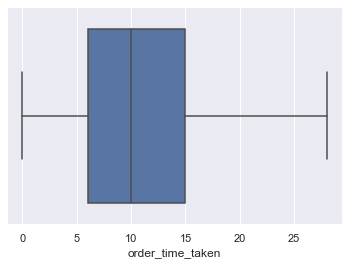

In [13]:
sns.set(font_scale=1)
sns.boxplot(x='order_time_taken', data=df, showfliers=False)

Let's see which order took 3 months to ship

In [14]:
df[df['order_time_taken'] > 180]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_time_taken
2609123,65b14237885b3972ebec28c0f7dd2220,78d26ae26b5bb9cb398edc7384d3c15f,13142,paulinia,SP,2fe324febf907e3ea3f2aa9650869fa5,delivered,2017-03-13 20:17:10,2017-03-13 20:17:10,2017-03-17 07:23:53,...,400.0,36.0,15.0,36.0,13142,-22.779282,-47.176836,paulinia,SP,189.0
2609124,65b14237885b3972ebec28c0f7dd2220,78d26ae26b5bb9cb398edc7384d3c15f,13142,paulinia,SP,2fe324febf907e3ea3f2aa9650869fa5,delivered,2017-03-13 20:17:10,2017-03-13 20:17:10,2017-03-17 07:23:53,...,400.0,36.0,15.0,36.0,13142,-22.793428,-47.188029,paulinia,SP,189.0
2609125,65b14237885b3972ebec28c0f7dd2220,78d26ae26b5bb9cb398edc7384d3c15f,13142,paulinia,SP,2fe324febf907e3ea3f2aa9650869fa5,delivered,2017-03-13 20:17:10,2017-03-13 20:17:10,2017-03-17 07:23:53,...,400.0,36.0,15.0,36.0,13142,-22.781090,-47.176759,paulinia,SP,189.0
2609126,65b14237885b3972ebec28c0f7dd2220,78d26ae26b5bb9cb398edc7384d3c15f,13142,paulinia,SP,2fe324febf907e3ea3f2aa9650869fa5,delivered,2017-03-13 20:17:10,2017-03-13 20:17:10,2017-03-17 07:23:53,...,400.0,36.0,15.0,36.0,13142,-22.777632,-47.167728,paulinia,SP,189.0
2609127,65b14237885b3972ebec28c0f7dd2220,78d26ae26b5bb9cb398edc7384d3c15f,13142,paulinia,SP,2fe324febf907e3ea3f2aa9650869fa5,delivered,2017-03-13 20:17:10,2017-03-13 20:17:10,2017-03-17 07:23:53,...,400.0,36.0,15.0,36.0,13142,-22.788341,-47.190601,paulinia,SP,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16582197,9cf2c3fa2632cee748e1a59ca9d09b21,3c2564d42f7ddd8b7576f0dd9cb1b4c5,49400,lagarto,SE,285ab9426d6982034523a855f55a885e,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,...,3100.0,38.0,99.0,14.0,49400,-10.910348,-37.672944,lagarto,SE,194.0
16582198,9cf2c3fa2632cee748e1a59ca9d09b21,3c2564d42f7ddd8b7576f0dd9cb1b4c5,49400,lagarto,SE,285ab9426d6982034523a855f55a885e,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,...,3100.0,38.0,99.0,14.0,49400,-10.936340,-37.670311,lagarto,SE,194.0
16582199,9cf2c3fa2632cee748e1a59ca9d09b21,3c2564d42f7ddd8b7576f0dd9cb1b4c5,49400,lagarto,SE,285ab9426d6982034523a855f55a885e,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,...,3100.0,38.0,99.0,14.0,49400,-10.919704,-37.669508,lagarto,SE,194.0
16582200,9cf2c3fa2632cee748e1a59ca9d09b21,3c2564d42f7ddd8b7576f0dd9cb1b4c5,49400,lagarto,SE,285ab9426d6982034523a855f55a885e,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,...,3100.0,38.0,99.0,14.0,49400,-10.915748,-37.668658,lagarto,SE,194.0


<AxesSubplot:xlabel='order_time_taken', ylabel='product_category_name'>

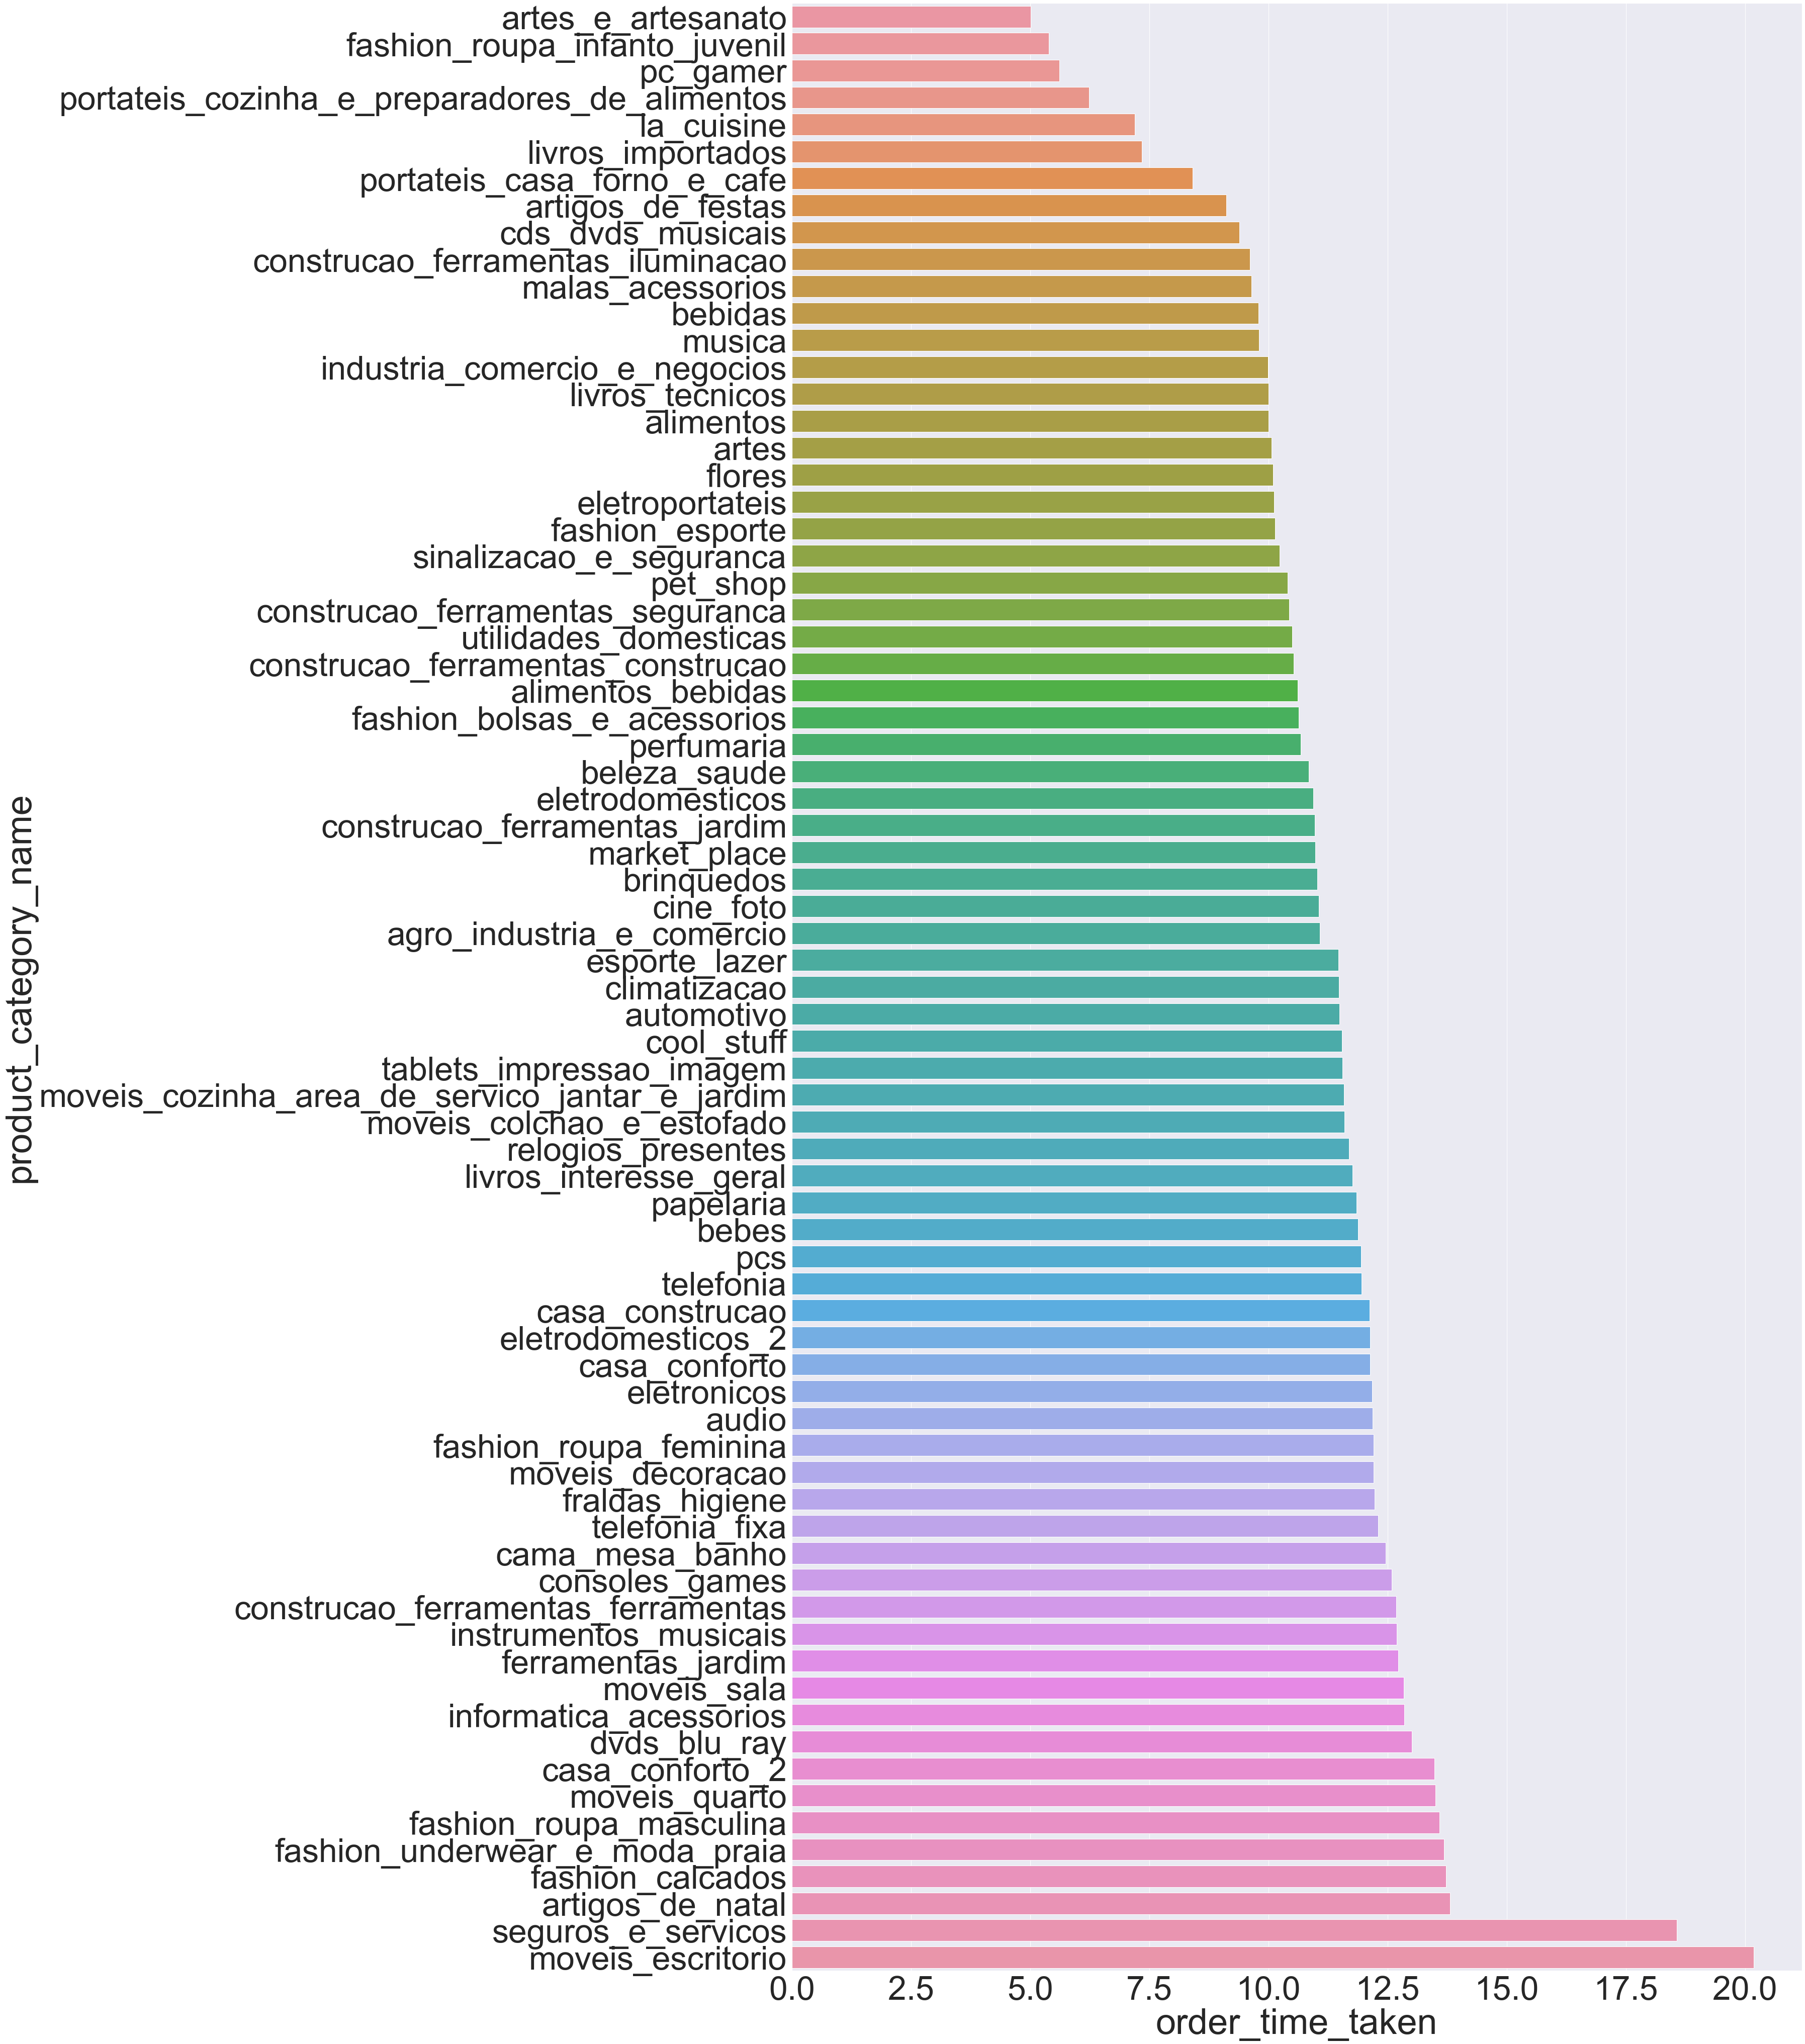

In [15]:
mean_order_time_by_product_category = df.groupby(by=['product_category_name'], as_index=False)[['order_time_taken', 'product_category_name']].mean().sort_values(by='order_time_taken').reset_index(drop=True)
    
sns.set(font_scale=6)
fig, ax = plt.subplots(figsize=(36, 72))
sns.barplot(ax=ax, x='order_time_taken', y='product_category_name', data=mean_order_time_by_product_category, order=mean_order_time_by_product_category['product_category_name'])

<AxesSubplot:xlabel='order_time_taken', ylabel='product_category_name'>

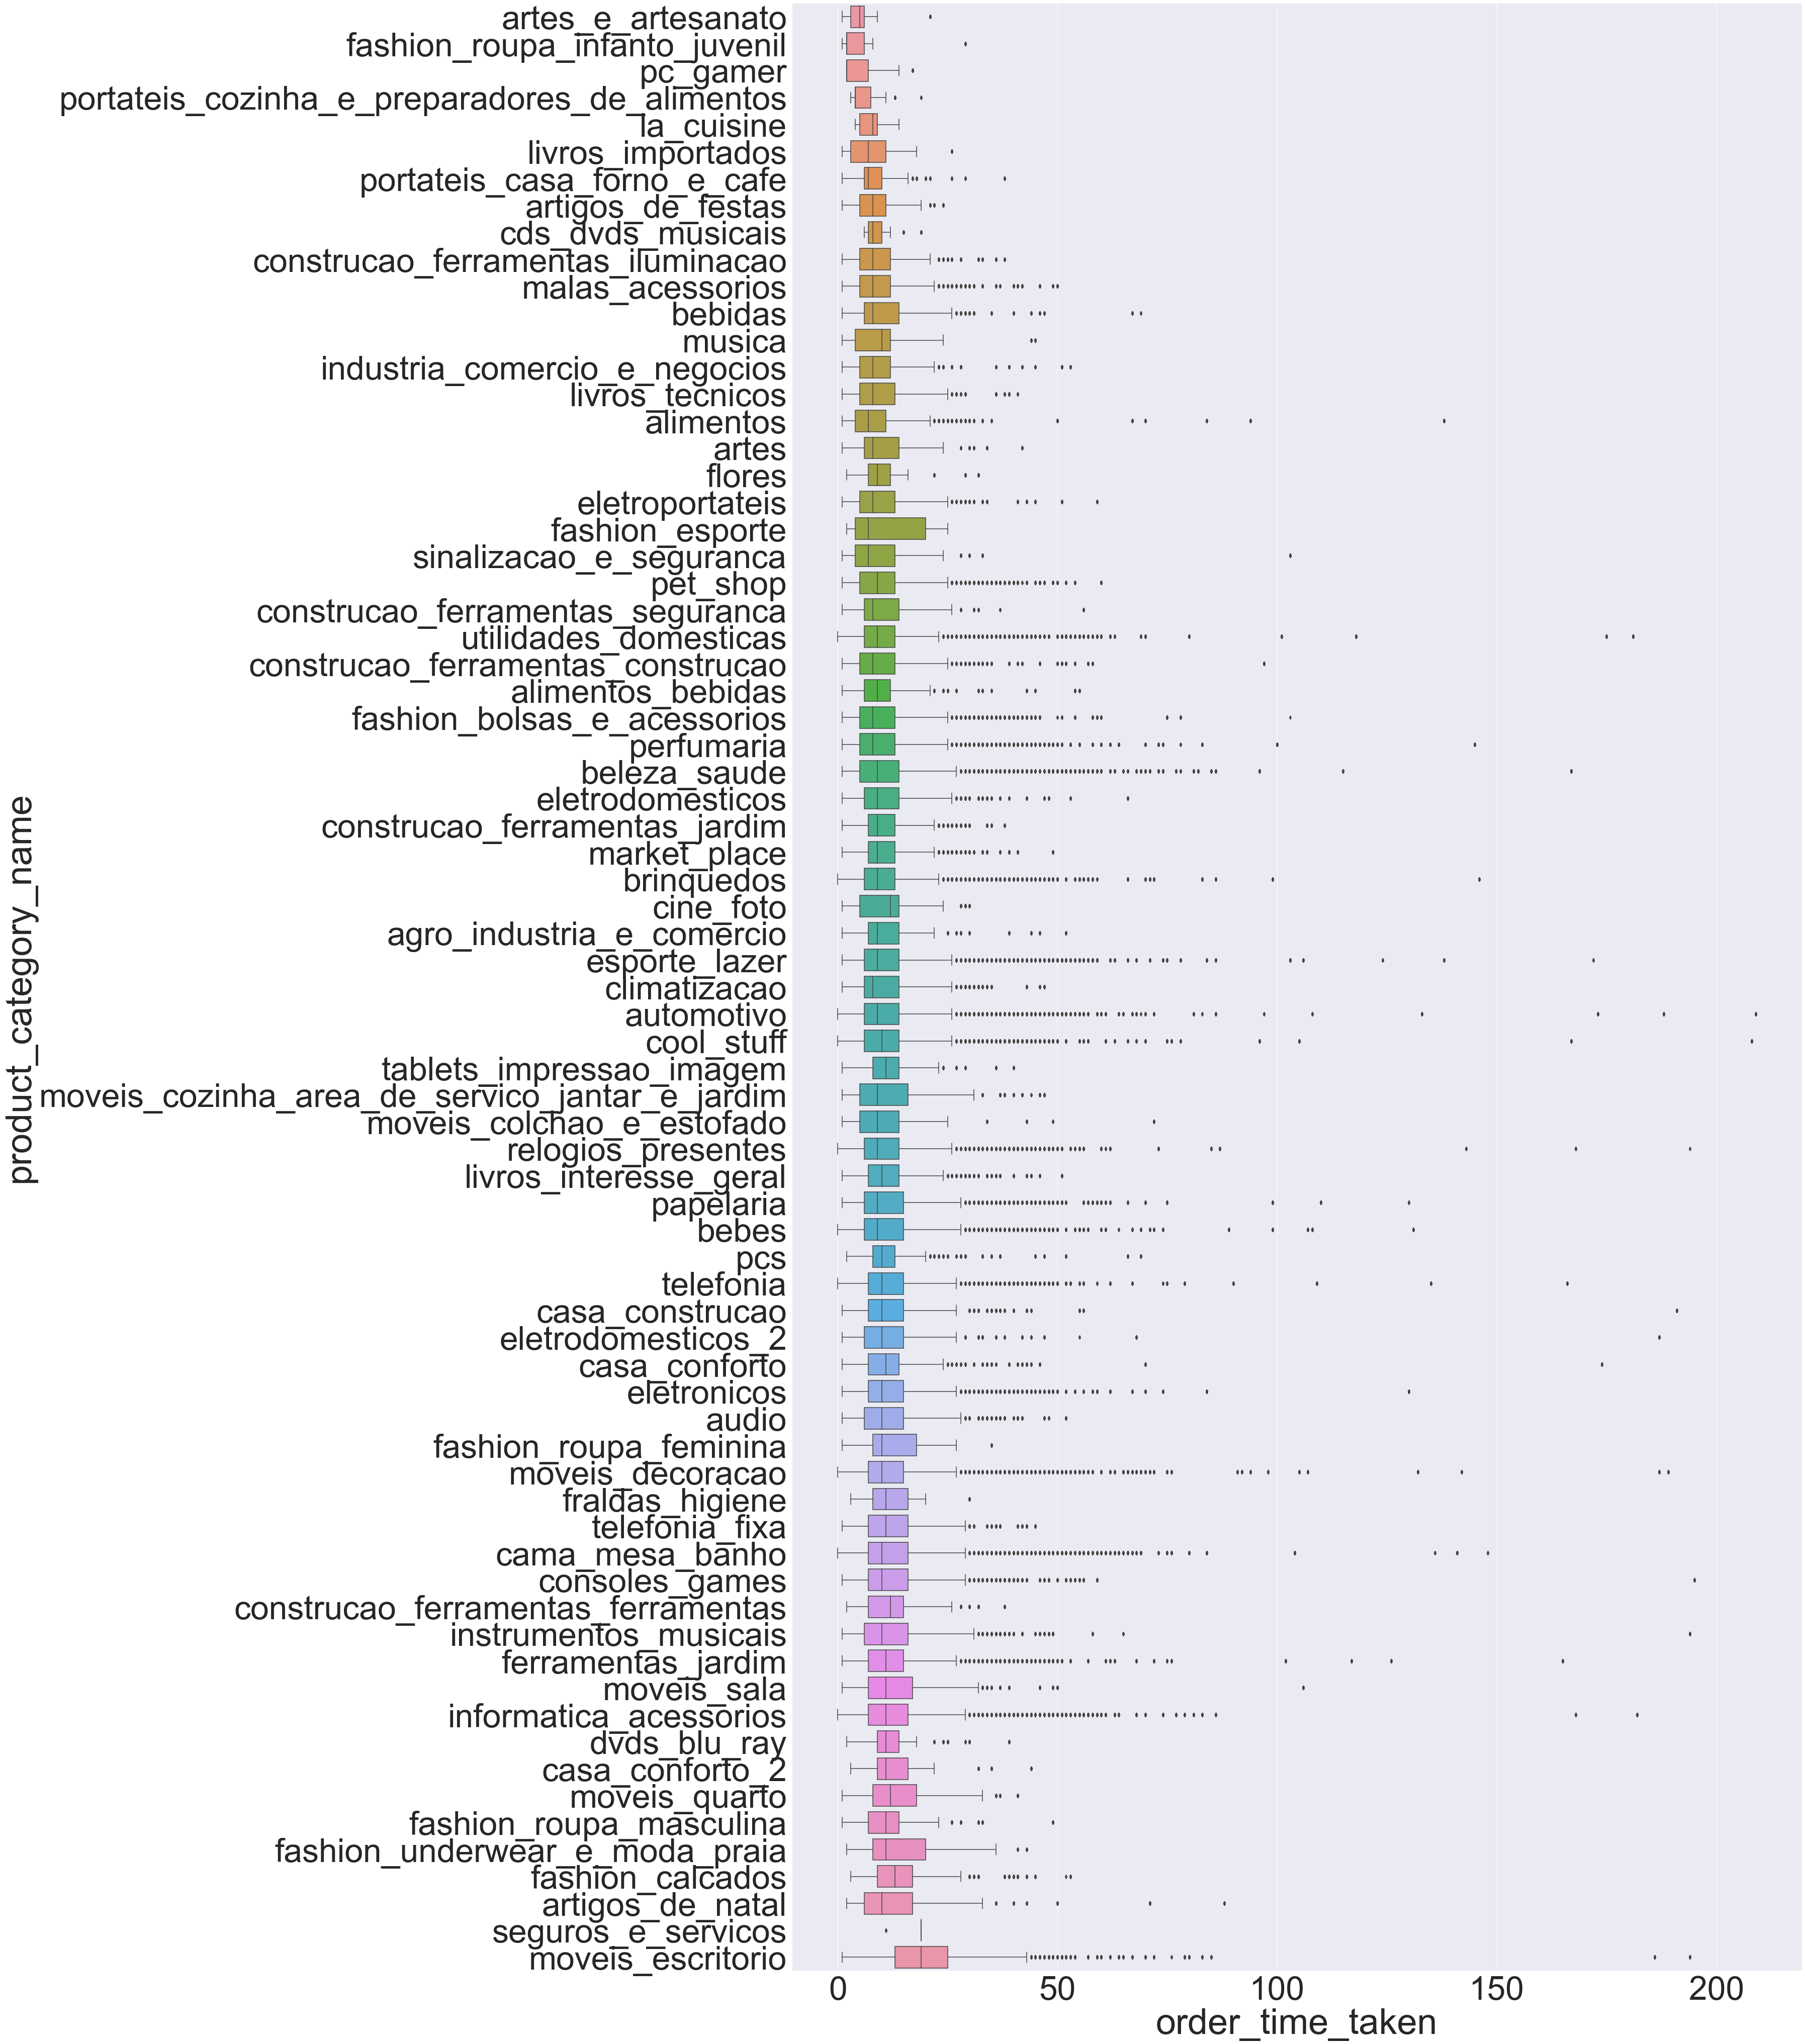

In [16]:
fig, ax = plt.subplots(figsize=(36, 72))
sns.set(font_scale=7)
sns.boxplot(ax=ax, x='order_time_taken', y='product_category_name', data=df, order=mean_order_time_by_product_category['product_category_name'])

In [17]:
mean_order_time_by_product_category

,product_category_name,order_time_taken
0,artes_e_artesanato,5.015826
1,fashion_roupa_infanto_juvenil,5.395933
2,pc_gamer,5.617969
3,portateis_cozinha_e_preparadores_de_alimentos,6.233581
4,la_cuisine,7.199139
...,...,...
68,fashion_underwear_e_moda_praia,13.688369
69,fashion_calcados,13.725983
70,artigos_de_natal,13.815654
71,seguros_e_servicos,18.567568


Geographical Information

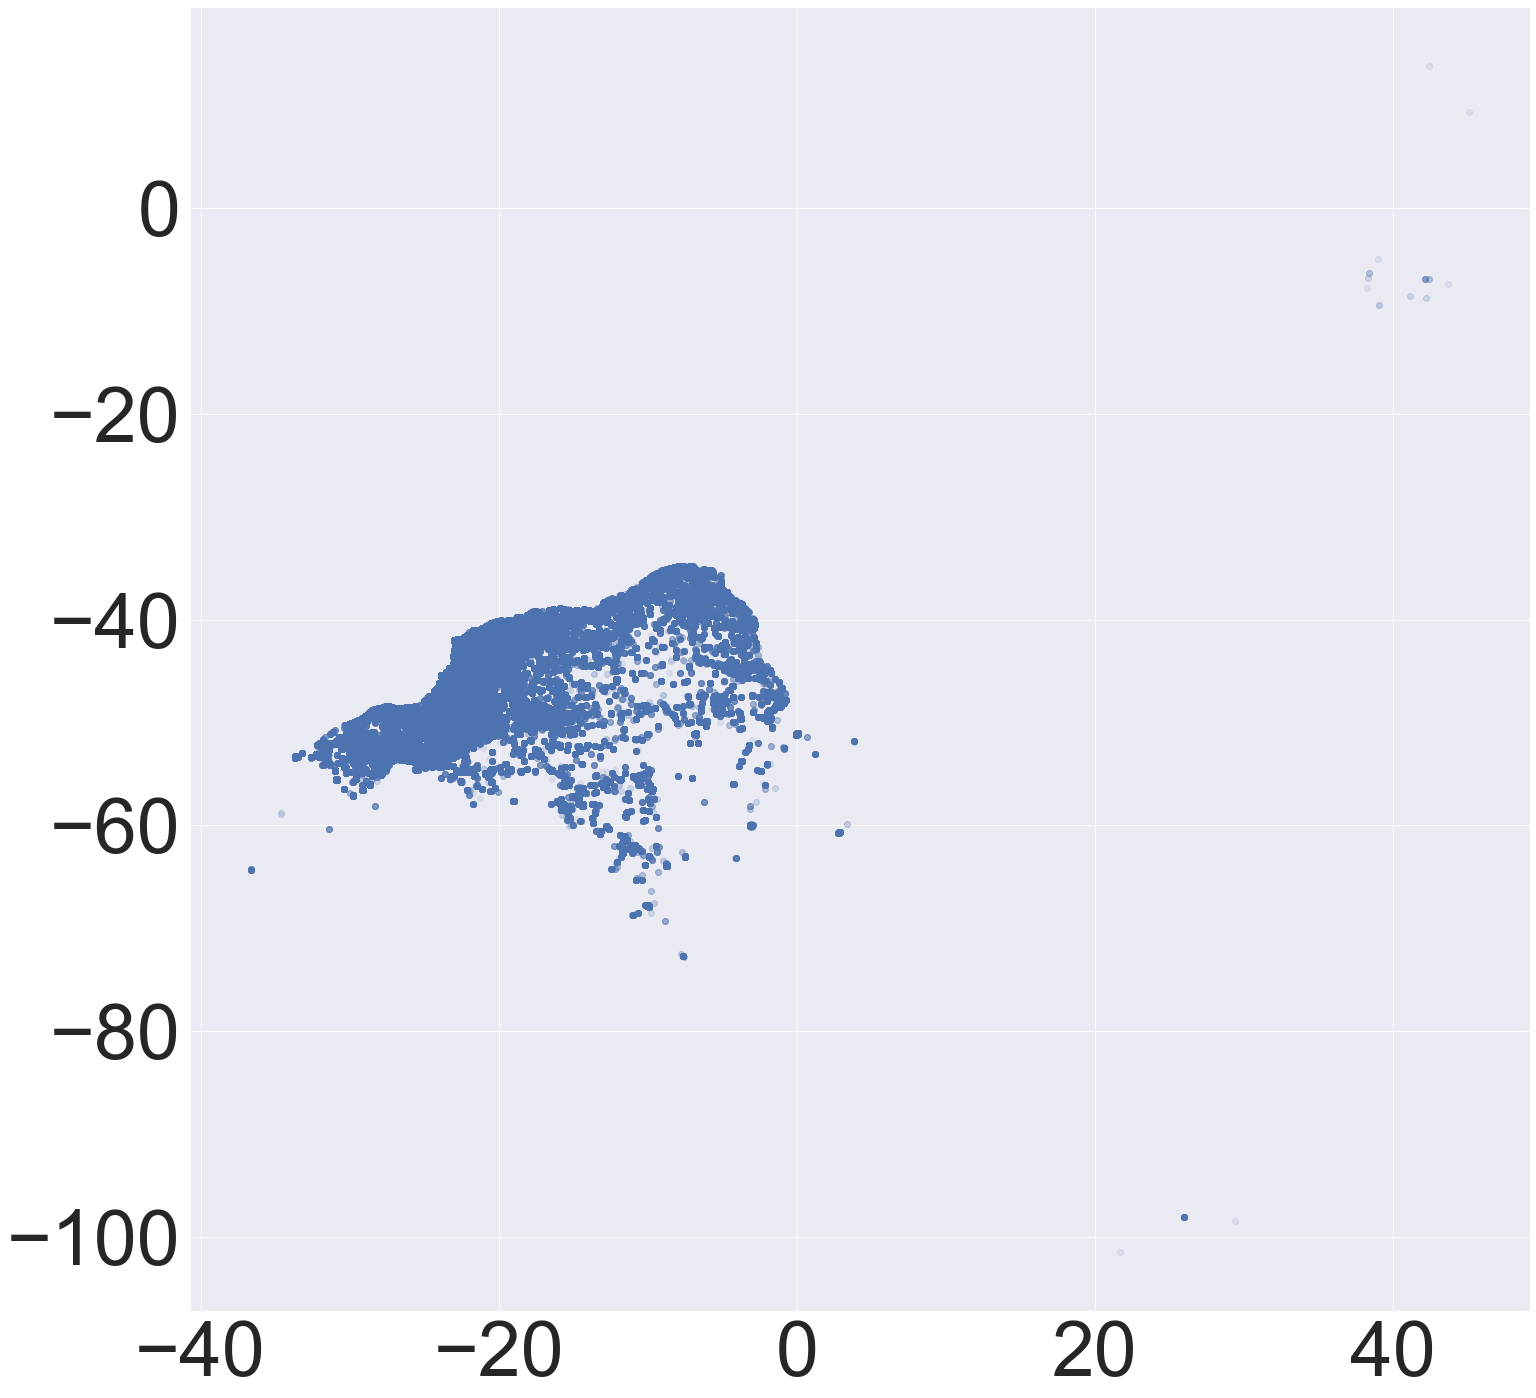

In [22]:
fig, ax = plt.subplots(figsize=(24, 24))
sns.set(font_scale=7)
ax.scatter(df['geolocation_lat'], df['geolocation_lng'], alpha=0.1)